In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Create your connection.
connection = sqlite3.connect('fast_dhsvm_parallel_run_raw_liv.db')

simulations = pd.read_sql_query("SELECT * FROM fast_dhsvm_parallel_run_raw_liv", connection)
validation = pd.read_csv('validation.csv')
print("Number of Runs:", len(simulations))

Number of Runs: 10


In [2]:
parameter_data = simulations[simulations.columns[simulations.columns.to_series().str.contains('par|like1')]]
features = list(parameter_data.columns[1:11])
print("* features:", features, sep="\n")
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor

y = parameter_data["like1"]
X = parameter_data[features]
dt = DecisionTreeRegressor(min_samples_split=50, random_state=99,max_depth=6,criterion='mse')
dt.fit(X, y)

* features:
['parRain_threshold', 'parSnow_Threshold']


DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           presort=False, random_state=99, splitter='best')

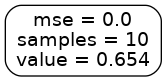

In [3]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())